---
title: "SVD for regression"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

This tutorial is partly based on the following sources:

* [Understanding Linear Regression using the Singular Value Decomposition](https://sthalles.github.io/svd-for-regression) by Thalles Silva.
* Brunton and Kutz's book, [Data-Driven Science and Engineering](/#data-driven-science-and-engineering-machine-learning-dynamical-systems-and-control), subsection 1.4 called "Pseudo-inverse, least-squares, and regression".

## the problem with Ordinary Least Squares

Let's say I want to predict the weight of a person based on their height. I have the following data:

| Height (cm) | Weight (kg) |
|-------------|-------------|
| 150         | 53          |
| 160         | 65          |
| 170         | 68          |
| 180         | 82          |
| 190         | 88          |

In [1]:
#| code-summary: "import libraries"
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

Text(0, 0.5, 'Weight (kg)')

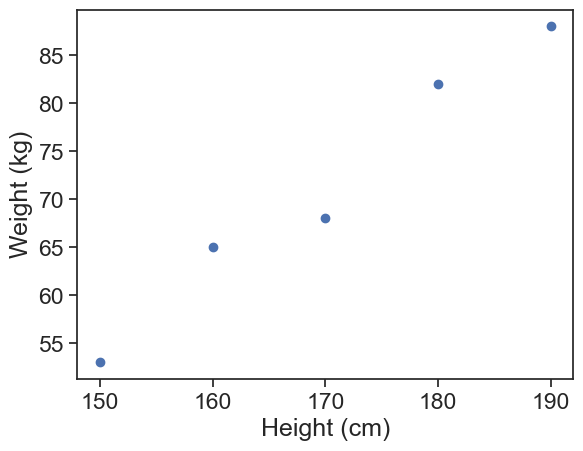

In [4]:
#| code-summary: "visualize data"
h = np.array([150 ,160, 170, 180, 190])
w = np.array([53,  65,  68,  82,  88])
fig, ax = plt.subplots()
ax.scatter(h, w)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")

I can try to predict the weight using a linear model:

$$
\text{weight} = \beta_0 + \beta_1 \cdot \text{height}.
\tag{1}
$$

In a general form, we can write this as:

$$
X\beta = y,
\tag{2}
$$

where $X$ is the design matrix, $\beta$ is the vector of coefficients, and $y$ is the vector of outputs (weights). This problem probably has no exact solution for $\beta$, because the design matrix $X$ is not square (there are more data points than parameters). So we want to find the best approximation $\hat{\beta}$ that minimizes the error:

$$
\hat{\beta} = \arg\min_\beta \|y - X\beta\|^2.
\tag{3}
$$

We know how to solve this, we use the equation we derived in the chapter ["the geometry of regression"](/regression/geometry-of-regression.html):

$$
\hat{\beta} = (X^TX)^{-1}X^Ty,
\tag{4}
$$

For a linear model, the design matrix is:

$$
X = 
\begin{bmatrix}
| & | \\
\mathbf{1} & h\\
| & |
\end{bmatrix}
=
\begin{bmatrix}
1 & 150 \\
1 & 160 \\
1 & 170 \\
1 & 180 \\
1 & 190
\end{bmatrix}
.
\tag{5}
$$

What does the matrix $X^T X$ look like?

\begin{align*}
X^TX &=
\begin{bmatrix}
- & \mathbf{1}^T & - \\
- & h^T & -
\end{bmatrix}
\begin{bmatrix}
| & | \\
\mathbf{1} & h\\
| & |
\end{bmatrix}\\
&=
\begin{bmatrix}
\mathbf{1}^T\mathbf{1} & \mathbf{1}^Th \\
h^T\mathbf{1} & h^Th
\end{bmatrix}\\
&=
\begin{bmatrix}
5 & 850 \\
850 & 153000
\end{bmatrix}
\tag{6}
\end{align*}

There's no problem inverting this matrix, so we can find the coefficient estimates $\hat{\beta}$ using the formula above.

Suppose now that we have a new predictor, the height of the person in inches. The design matrix now looks like this:

$$
X =
\begin{bmatrix}
| & | & | \\
\mathbf{1} & h_{cm} & h_{inch}\\
| & | & |
\end{bmatrix}
\tag{7}
$$

Obviously, the columns $h_{cm}$ and $h_{inch}$ are linearly dependent ($h_{cm}=ah_{inch}$). This means that the matrix $X^TX$ also has linearly dependent columns:

\begin{align*}
X^TX &=
\begin{bmatrix}
- & \mathbf{1}^T & - \\
- & h_{cm}^T & - \\
- & h_{inch}^T & -
\end{bmatrix}
\begin{bmatrix}
| & | & | \\
\mathbf{1} & h_{cm} & h_{inch}\\
| & | & |
\end{bmatrix}
\\
&=
\begin{bmatrix}
\mathbf{1}^T\mathbf{1} & \mathbf{1}^Th_{cm} & \mathbf{1}^Th_{inch} \\
h_{cm}^T\mathbf{1} & h_{cm}^Th_{cm} & h_{cm}^Th_{inch} \\
h_{inch}^T\mathbf{1} & h_{inch}^Th_{cm} & h_{inch}^Th_{inch}
\end{bmatrix}
\tag{8}
\end{align*}

Using the fact that $h_{cm}=ah_{inch}$, we can see that the second and third columns are linearly dependent. This means that the matrix $X^TX$ is not invertible, and we cannot use the formula above to find the coefficient estimates $\hat{\beta}$. What now?

This is an extreme case, but problems similar to this can happen in real life. For example, if we have two predictors that are highly correlated, the matrix $X^TX$ will be close to singular (not invertible). In this case, the coefficients $\beta$ will be very sensitive to small changes in the data.

## SVD to the rescue

Let's use Singular Value Decomposition (SVD) to find the coefficients $\beta$. SVD is a powerful technique that can handle multicollinearity and other issues in the data.

The SVD of a matrix $X$ is given by:

$$
X = U\Sigma V^T,
\tag{9}
$$

where $U$ and $V$ are orthogonal matrices and $\Sigma$ is a diagonal matrix with singular values on the diagonal.

We can plug the SVD of $X$ into the least squares problem, which is to find the $\hat{\beta}$ that best satisfies $X\hat{\beta} = \hat{y}$:

$$
U\Sigma V^T\hat{\beta} = \hat{y}.
\tag{10}
$$

We define now the Moore-Penrose pseudo-inverse of $X$, which is given by:

$$
X^+ = V\Sigma^+U^T,
\tag{11}
$$

where $\Sigma^+$ is obtained by taking the reciprocal of the non-zero singular values in $\Sigma$ and transposing the resulting matrix.

This pseudo-inverse has the following properties:

* $X^+X = I$. This means that $X^+$ is a left-inverse of $X$.
* $XX^+$ is a projection matrix onto the column space of $X$. In other words, left-multiplying $XX^+$ to any vector gives the projection of that vector onto the column space of $X$. In particular, $XX^+y = \hat{y}$.
  
  This is very similar to the property we used in the chapter ["the geometry of regression"](/regression/geometry-of-regression.html), where we had $P_Xy = \hat{y}$, with $P_X$ being the projection matrix onto the column space of $X$. There, we found that

  $$
  \hat{\beta} = (X^TX)^{-1}X^Ty,
  $$

  Left-multiplying both sides by $X$ gives:
  $$
  X\hat{\beta} = X(X^TX)^{-1}X^Ty = P_Xy = \hat{y}.
  $$
  So we found that in the OLS case, $X(X^TX)^{-1}X^T$ is the projection matrix onto the column space of $X$. Here, we have a more general result that works even when $X^TX$ is not invertible: $XX^+$ is the projection matrix onto the column space of $X$.

We left-multiply Eq. (10) by $X^+$, and also substitute $\hat{y}=XX^+y$ as we just saw:

\begin{align*}
X^+ (U\Sigma V^T\hat{\beta}) &= X^+XX^+y\\
(V\Sigma^+U^T)(U\Sigma V^T)\hat{\beta} &= X^+y
\tag{12}
\end{align*}

The term $(V\Sigma^+U^T)(U\Sigma V^T)$ simplifies to the identity matrix, so we have:

$$
\hat{\beta} = X^+y = V\Sigma^+U^Ty.
\tag{13}
$$

This is the formula we will use to find the coefficients $\hat{\beta}$ using SVD. This formula works even when $X^TX$ is not invertible, and it is more stable than the OLS formula.

## in practice

Let's go back to the problematic example with height in cm and inches. We can use the SVD to find the coefficients $\hat{\beta}$.

In [ ]:
#| code-fold: false
# design matrix with intercept, height in cm and height in inches
conversion_factor = 2.54
X = np.vstack([np.ones(len(h)), h, h/conversion_factor]).T
# compute SVD of X
U, S, VT = np.linalg.svd(X, full_matrices=False)
Sigma = np.diag(S)
V = VT.T
# compute coefficients using SVD
y = w
Sigma_plus = np.zeros(Sigma.T.shape)
for i in range(len(S)):
    if S[i] > 1e-10:  # avoid division by zero
        Sigma_plus[i, i] = 1 / S[i]
X_plus = V @ Sigma_plus @ U.T
beta_hat = X_plus @ y
# make predictions
y_hat = X @ beta_hat

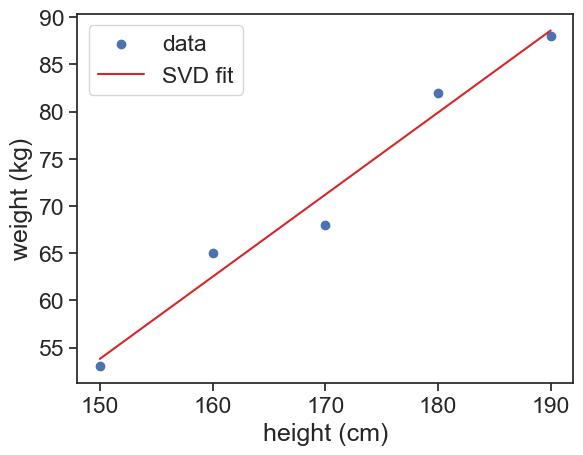

In [16]:
#| code-summary: "plot results"
fig, ax = plt.subplots()
ax.scatter(h, w, label="data")
# plot predictions
ax.plot(h, y_hat, color="tab:red", label="SVD fit")
ax.legend()
ax.set_xlabel("height (cm)")
ax.set_ylabel("weight (kg)");